# 0) Imports

In [1]:
# install the main library YFinance
!pip install yfinance

In [2]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date


# 1) Understanding Data-Driven Decisions data pulls

In [3]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2025; month= 6; day=9
Period for indexes: 1955-06-09 to 2025-06-09 


## 1.1) GDP

In [4]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)

In [5]:
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(1)-1
gdppot.tail(15)

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2021-10-01,21606.08076,0.020390,0.005260
2022-01-01,21722.02480,0.020882,0.005366
2022-04-01,21840.56636,0.021403,0.005457
2022-07-01,21961.53508,0.021799,0.005539
2022-10-01,22084.92536,0.022162,0.005618
2023-01-01,22208.24254,0.022384,0.005584
2023-04-01,22333.11239,0.022552,0.005623
2023-07-01,22459.74068,0.022685,0.005670
2023-10-01,22588.18459,0.022787,0.005719


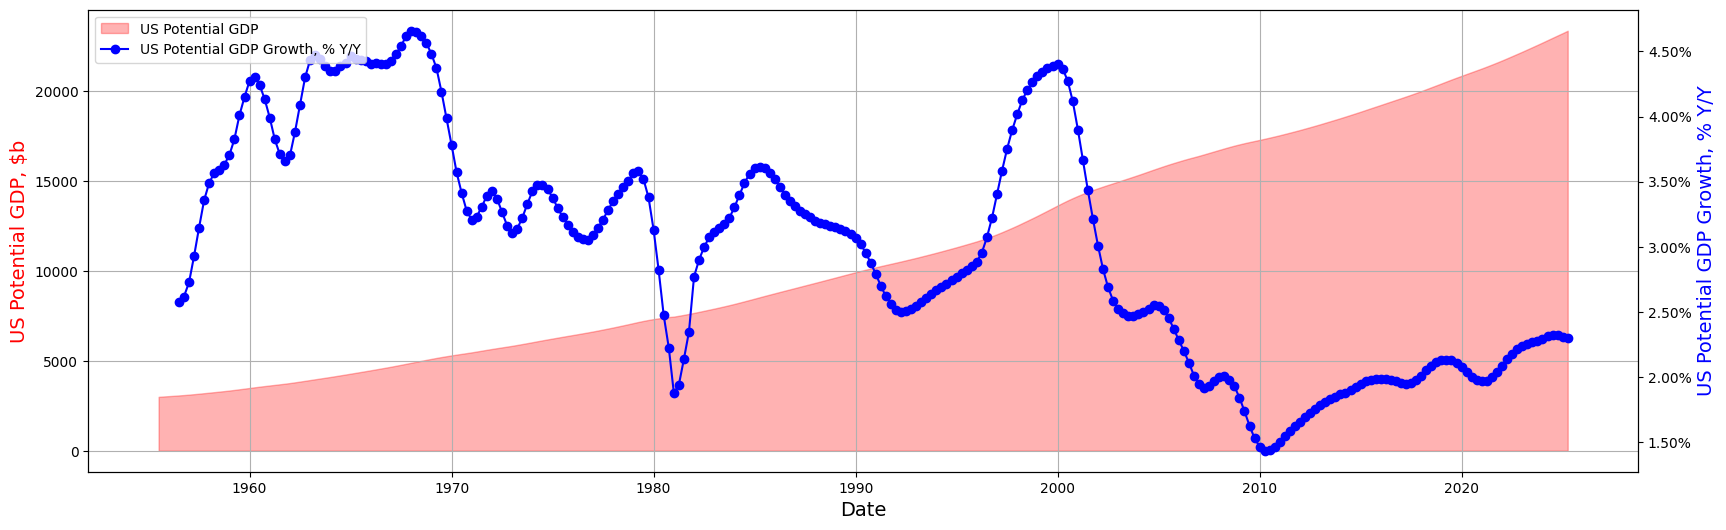

In [6]:
# Visuals GDPPOT
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
ax.fill_between(gdppot.index, gdppot.GDPPOT, color="red", alpha=0.3, label="US Potential GDP")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdppot.gdppot_us_yoy, color="blue", marker="o", label="US Potential GDP Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Potential GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("US Potential GDP Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## 1.2) Inflation - CPI Core

In [7]:
# # "Core CPI index", MONTHLY
# https://fred.stlouisfed.org/series/CPILFESL
# The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
# is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy.
# This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices.
cpilfesl = pdr.DataReader("CPILFESL", "fred", start=start)

In [8]:
cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1

cpilfesl.tail(13)

,CPILFESL,cpi_core_yoy,cpi_core_mom
DATE,,,
2024-04-01,317.596,0.036236,0.002633
2024-05-01,318.053,0.033905,0.001439
2024-06-01,318.343,0.032606,0.000912
2024-07-01,318.933,0.032283,0.001853
2024-08-01,319.839,0.032918,0.002841
2024-09-01,320.835,0.032899,0.003114
2024-10-01,321.688,0.032928,0.002659
2024-11-01,322.619,0.032801,0.002894
2024-12-01,323.296,0.032136,0.002098


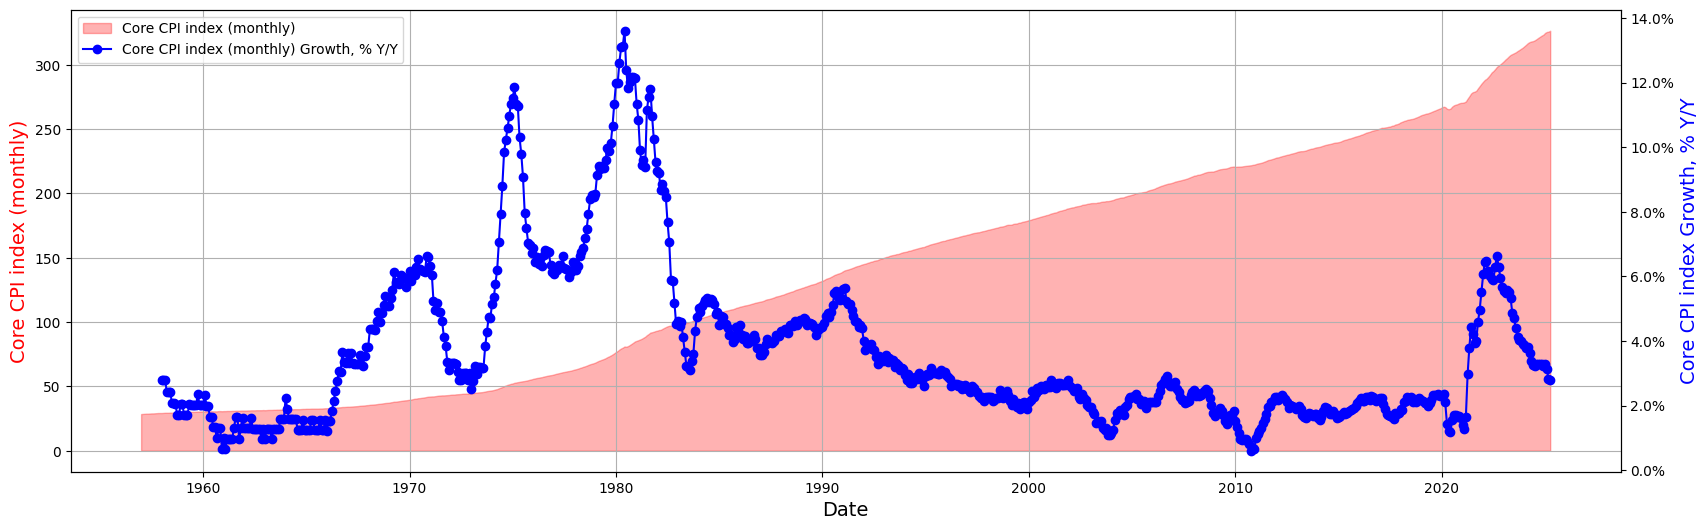

In [9]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(cpilfesl.index, cpilfesl.CPILFESL, color="red", alpha=0.3, label="Core CPI index (monthly)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cpilfesl.cpi_core_yoy, color="blue", marker="o", label="Core CPI index (monthly) Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Core CPI index (monthly)", color="red", fontsize=14)
ax2.set_ylabel("Core CPI index Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## 1.3 Interest rates

In [10]:
# Fed rate https://fred.stlouisfed.org/series/FEDFUNDS
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail(10)

,FEDFUNDS
DATE,
2024-08-01,5.33
2024-09-01,5.13
2024-10-01,4.83
2024-11-01,4.64
2024-12-01,4.48
2025-01-01,4.33
2025-02-01,4.33
2025-03-01,4.33
2025-04-01,4.33


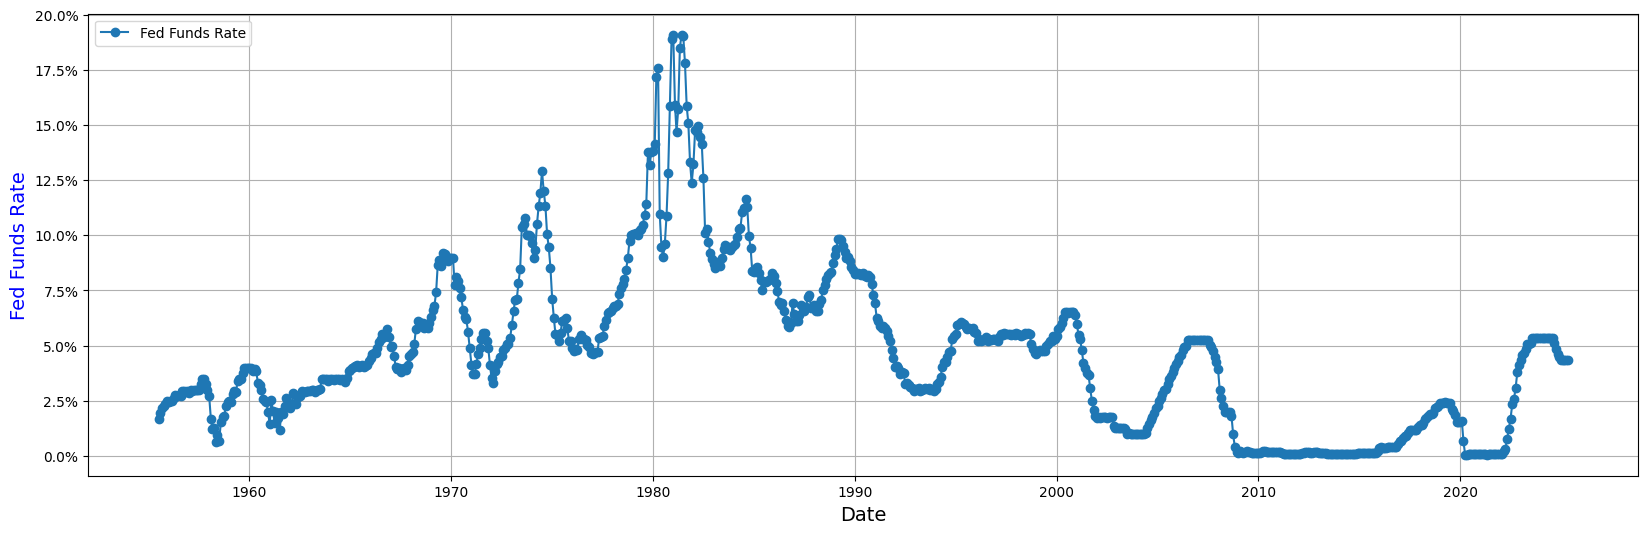

In [11]:
# Fed Funds
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
# ax.fill_between(fedfunds.index, fedfunds.FEDFUNDS, color="red", alpha=0.3, label="Core CPI index (monthly)")

# # Creating a secondary y-axis for GDP growth percentage
# ax2 = ax.twinx()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.plot(fedfunds.index, fedfunds.FEDFUNDS/100, marker="o", label="Fed Funds Rate")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Fed Funds Rate", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()

In [12]:
# https://fred.stlouisfed.org/series/DGS1
dgs1 = pdr.DataReader("DGS1", "fred", start=start)
dgs1.tail()

,DGS1
DATE,
2025-05-30,4.11
2025-06-02,4.12
2025-06-03,4.12
2025-06-04,4.06
2025-06-05,4.08


Other rates for US Treasury: https://fred.stlouisfed.org/categories/115  
* https://fred.stlouisfed.org/series/DGS2
* https://fred.stlouisfed.org/series/DGS3
* https://fred.stlouisfed.org/series/DGS5
* https://fred.stlouisfed.org/series/DGS10
...

In [13]:
# https://fred.stlouisfed.org/series/DGS5
dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail()

,DGS5
DATE,
2025-05-30,3.96
2025-06-02,4.01
2025-06-03,4.04
2025-06-04,3.93
2025-06-05,3.99


## 1.4 SNP500

In [14]:
# Other indexes: https://stooq.com/t/

# SPX= S&P500
spx_index = pdr.get_data_stooq('^SPX', start, end)
spx_index.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-06-06,5987.06,6016.87,5978.63,6000.36,2.553321e+09
2025-06-05,5985.67,5999.70,5921.20,5939.30,3.140508e+09
2025-06-04,5978.94,5990.48,5966.11,5970.81,2.682443e+09
2025-06-03,5938.56,5981.35,5929.00,5970.37,2.995304e+09
2025-06-02,5896.68,5937.40,5861.43,5935.94,2.765358e+09


In [15]:
# 252 trading days a year
  # REVERSE ORDER OF THE DATA!!!
spx_index['spx_dod'] = (spx_index.Close/spx_index.Close.shift(-1)-1)
spx_index['spx_qoq'] = (spx_index.Close/spx_index.Close.shift(-63)-1)
spx_index['spx_yoy'] = (spx_index.Close/spx_index.Close.shift(-252)-1)

In [16]:
spx_index.head()

,Open,High,Low,Close,Volume,spx_dod,spx_qoq,spx_yoy
Date,,,,,,,,
2025-06-06,5987.06,6016.87,5978.63,6000.36,2.553321e+09,0.010281,0.039888,0.133996
2025-06-05,5985.67,5999.70,5921.20,5939.30,3.140508e+09,-0.005277,0.034988,0.124144
2025-06-04,5978.94,5990.48,5966.11,5970.81,2.682443e+09,0.000074,0.021939,0.131369
2025-06-03,5938.56,5981.35,5929.00,5970.37,2.995304e+09,0.005800,0.033267,0.140367
2025-06-02,5896.68,5937.40,5861.43,5935.94,2.765358e+09,0.004102,0.014739,0.127017


In [17]:
spx_truncated = spx_index[spx_index.index>='1990-01-01']

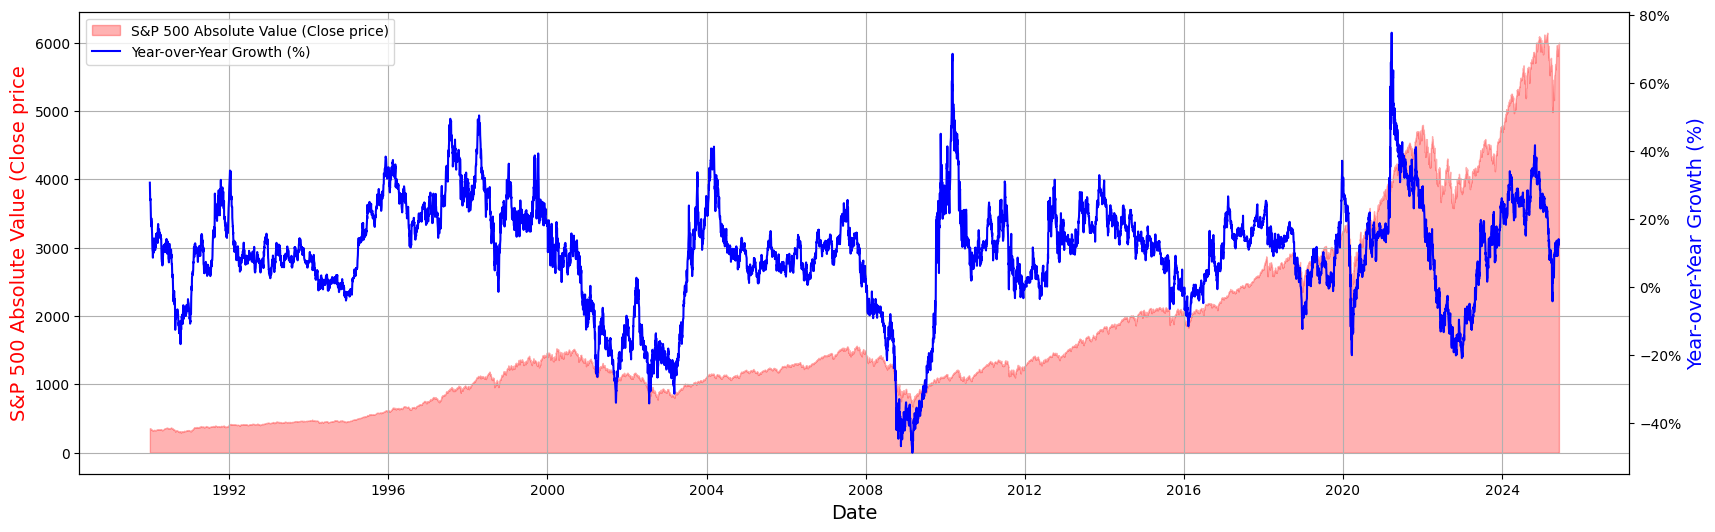

In [18]:
# S&P500 abs. vs. relative growth
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(spx_truncated.index, spx_truncated.Close, color="red", alpha=0.3, label="S&P 500 Absolute Value (Close price)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(spx_truncated.spx_yoy,
         color="blue",
        #  marker=".",
         label="Year-over-Year Growth (%)")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("S&P 500 Absolute Value (Close price", color="red", fontsize=14)
ax2.set_ylabel("Year-over-Year Growth (%)", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

# 2) Data Sources for Stocks

## 2.1 OHLCV data daily - INDEXES

In [19]:
# INDEXES from Yahoo Finance
# DAX index (XETRA - XETRA Delayed Price. Currency in EUR)
# WEB: https://finance.yahoo.com/quote/%5EGDAXI
# Option 1: dax_daily = yf.download(tickers = ["^GDAXI"],
#                      period = "max",
#                      interval = "1d")

# Option 2 (preferred):
# Download data with Adj Close for more accurate price reflections
ticker_obj = yf.Ticker("^GDAXI")
dax_daily = ticker_obj.history(start = start)

In [20]:
dax_daily.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-06-03 00:00:00+02:00,24031.960938,24101.550781,23826.390625,24091.619141,50506800,0.0,0.0
2025-06-04 00:00:00+02:00,24253.689453,24346.150391,24129.320312,24276.480469,54182400,0.0,0.0
2025-06-05 00:00:00+02:00,24281.210938,24479.419922,24220.710938,24323.580078,53665700,0.0,0.0
2025-06-06 00:00:00+02:00,24304.369141,24355.029297,24214.529297,24304.460938,41235800,0.0,0.0
2025-06-09 00:00:00+02:00,24252.259766,24289.509766,24153.160156,24249.009766,0,0.0,0.0


In [21]:
# normally 252 trading days
dax_daily['adj_close_last_year'] = dax_daily['Close'].shift(252)
dax_daily['yoy_growth'] = dax_daily['Close'] / dax_daily['adj_close_last_year'] -1

In [22]:
dax_daily

,Open,High,Low,Close,Volume,Dividends,Stock Splits,adj_close_last_year,yoy_growth
Date,,,,,,,,,
1987-12-30 00:00:00+01:00,1005.190002,1005.190002,1005.190002,1005.190002,0,0.0,0.0,NaN,NaN
1988-01-04 00:00:00+01:00,956.489990,956.489990,956.489990,956.489990,0,0.0,0.0,NaN,NaN
1988-01-05 00:00:00+01:00,996.099976,996.099976,996.099976,996.099976,0,0.0,0.0,NaN,NaN
1988-01-06 00:00:00+01:00,1006.010010,1006.010010,1006.010010,1006.010010,0,0.0,0.0,NaN,NaN
1988-01-07 00:00:00+01:00,1014.469971,1014.469971,1014.469971,1014.469971,0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-06-03 00:00:00+02:00,24031.960938,24101.550781,23826.390625,24091.619141,50506800,0.0,0.0,18405.640625,0.308926
2025-06-04 00:00:00+02:00,24253.689453,24346.150391,24129.320312,24276.480469,54182400,0.0,0.0,18575.939453,0.306878
2025-06-05 00:00:00+02:00,24281.210938,24479.419922,24220.710938,24323.580078,53665700,0.0,0.0,18652.669922,0.304027


<Axes: xlabel='Date'>

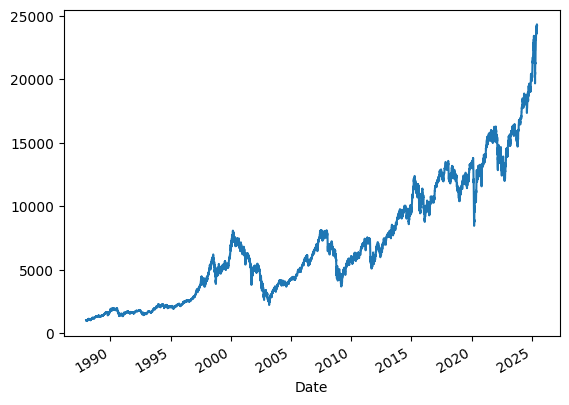

In [23]:
dax_daily['Close'].plot.line()

In [24]:
# delayed 15 min : https://finance.yahoo.com/quote/%5ESPX/
# S&P 500 INDEX : Chicago Options - Chicago Options Delayed Price. Currency in USD
ticker_obj = yf.Ticker("^SPX")
snp500_daily = ticker_obj.history(start = start, interval = "1d")

# old version:
# snp500_daily = yf.download(tickers = "^SPX",
#                      period = "max",
#                      interval = "1d")

In [25]:
snp500_daily.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-06-02 00:00:00-04:00,5896.680176,5937.399902,5861.430176,5935.939941,4832240000,0.0,0.0
2025-06-03 00:00:00-04:00,5938.560059,5981.350098,5929.000000,5970.370117,5026680000,0.0,0.0
2025-06-04 00:00:00-04:00,5978.939941,5990.479980,5966.109863,5970.810059,4767050000,0.0,0.0
2025-06-05 00:00:00-04:00,5985.669922,5999.700195,5921.200195,5939.299805,5091850000,0.0,0.0
2025-06-06 00:00:00-04:00,5987.060059,6016.870117,5978.629883,6000.359863,4355710000,0.0,0.0


In [26]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
# https://www.investopedia.com/insights/introduction-to-stock-market-indices/

ticker_obj = yf.Ticker("^GSPC")
snp500_daily_non_delayed = ticker_obj.history(start = start, interval = "1d")

# old version:
# snp500_daily_non_delayed = yf.download(tickers = "^GSPC",
#                      period = "max",
#                      interval = "1d")

In [27]:
snp500_daily_non_delayed.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-06-02 00:00:00-04:00,5896.680176,5937.399902,5861.430176,5935.939941,4832240000,0.0,0.0
2025-06-03 00:00:00-04:00,5938.560059,5981.350098,5929.000000,5970.370117,5026680000,0.0,0.0
2025-06-04 00:00:00-04:00,5978.939941,5990.479980,5966.109863,5970.810059,4767050000,0.0,0.0
2025-06-05 00:00:00-04:00,5985.669922,5999.700195,5921.200195,5939.299805,5091850000,0.0,0.0
2025-06-06 00:00:00-04:00,5987.060059,6016.870117,5978.629883,6000.359863,4355710000,0.0,0.0


In [28]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch

ticker_obj = yf.Ticker("^DJI")
dji_daily = ticker_obj.history(start = start, interval = "1d")

# dji_daily = yf.download(tickers = "^DJI",
#                      period = "max",
#                      interval = "1d")

## 2.2 OHLCV data daily - ETFs

In [29]:
# https://finance.yahoo.com/quote/VOO?.tsrc=fin-srch

ticker_obj = yf.Ticker("VOO")
voo_etf = ticker_obj.history(start = start, interval = "1d")

# voo_etf = yf.download(tickers = "VOO",
#                      period = "max",
#                      interval = "1d")


In [30]:
voo_etf.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2025-06-02 00:00:00-04:00,540.250000,544.909973,537.799988,544.909973,5933500,0.0,0.0,0.0
2025-06-03 00:00:00-04:00,544.530029,548.869995,544.090027,548.000000,4993600,0.0,0.0,0.0
2025-06-04 00:00:00-04:00,548.750000,549.650024,547.440002,547.650024,4543400,0.0,0.0,0.0
2025-06-05 00:00:00-04:00,549.479980,550.630005,543.340027,545.090027,6372100,0.0,0.0,0.0
2025-06-06 00:00:00-04:00,550.299988,552.320007,548.700012,550.659973,4728500,0.0,0.0,0.0


In [31]:
# ETFs
# WisdomTree India Earnings Fund (EPI)
# NYSEArca - Nasdaq Real Time Price. Currency in USD
# WEB: https://finance.yahoo.com/quote/EPI/history?p=EPI

ticker_obj = yf.Ticker("EPI")
epi_etf_daily = ticker_obj.history(start = start, interval = "1d")

# epi_etf_daily = yf.download(tickers = "EPI",
#                      period = "max",
#                      interval = "1d")

In [32]:
epi_etf_daily.head()
print(epi_etf_daily.shape)

(4349, 8)


In [33]:
# find dividends impact on Close vs. Adj.Close
epi_etf_daily[epi_etf_daily.Dividends>0].tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2021-12-27 00:00:00-05:00,33.577710,33.801812,33.577710,33.764462,379100,0.192,0.0,0.0
2022-03-25 00:00:00-04:00,33.563275,33.666313,33.432129,33.666313,584400,0.115,0.0,0.0
2022-06-24 00:00:00-04:00,29.420327,29.778748,29.370547,29.768791,387900,1.845,0.0,0.0
2023-06-26 00:00:00-04:00,34.020314,34.070182,33.960471,33.990395,634600,0.060,0.0,0.0
2024-12-26 00:00:00-05:00,45.840000,45.840000,45.700001,45.820000,685600,0.121,0.0,0.0


In [34]:
epi_etf_daily[(epi_etf_daily.index >='2024-12-23') & (epi_etf_daily.index <='2024-12-28')]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-12-23 00:00:00-05:00,45.609761,45.879052,45.609761,45.869080,630400,0.000,0.0,0.0
2024-12-24 00:00:00-05:00,45.719475,45.928922,45.709503,45.899002,277100,0.000,0.0,0.0
2024-12-26 00:00:00-05:00,45.840000,45.840000,45.700001,45.820000,685600,0.121,0.0,0.0
2024-12-27 00:00:00-05:00,45.570000,45.650002,45.500000,45.639999,774900,0.000,0.0,0.0


In [35]:
# find dividends - diff for Close vs. Adj Close
# Open/Close for 06-25 diff is close to divs = 1.845 (~1.58 for Open and 1.3 for Close)
# HELP: https://help.yahoo.com/kb/SLN28256.html#:~:text=Adjusted%20close%20is%20the%20closing,Security%20Prices%20(CRSP)%20standards.
epi_etf_daily[(epi_etf_daily.index >='2024-12-23') & (epi_etf_daily.index <='2024-12-28')]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-12-23 00:00:00-05:00,45.609761,45.879052,45.609761,45.869080,630400,0.000,0.0,0.0
2024-12-24 00:00:00-05:00,45.719475,45.928922,45.709503,45.899002,277100,0.000,0.0,0.0
2024-12-26 00:00:00-05:00,45.840000,45.840000,45.700001,45.820000,685600,0.121,0.0,0.0
2024-12-27 00:00:00-05:00,45.570000,45.650002,45.500000,45.639999,774900,0.000,0.0,0.0


In [36]:
# Previous option : no Div. dates , same stats
epi_etf_daily2 = yf.download(tickers = "EPI",
                     period = "max",
                     interval = "1d")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [37]:
epi_etf_daily2[epi_etf_daily2.index>='2024-12-23'].head()

Price,Close,High,Low,Open,Volume
Ticker,EPI,EPI,EPI,EPI,EPI
Date,,,,,
2024-12-23,45.869080,45.879052,45.609761,45.609761,630400
2024-12-24,45.899002,45.928922,45.709503,45.719475,277100
2024-12-26,45.820000,45.840000,45.700001,45.840000,685600
2024-12-27,45.639999,45.650002,45.500000,45.570000,774900
2024-12-30,45.090000,45.180000,44.980000,45.180000,1442100


<Axes: title={'center': "EPI's etf stock price"}, xlabel='Date'>

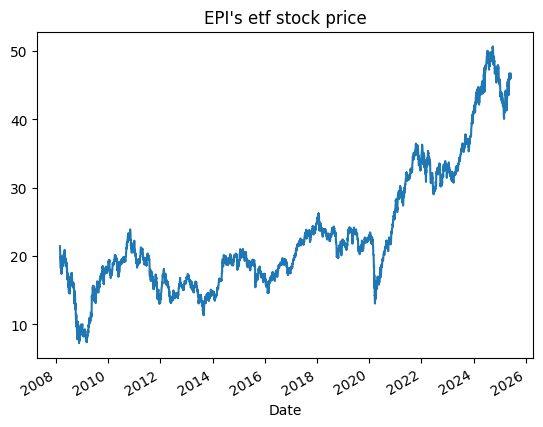

In [38]:
# About yFinance: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

epi_etf_daily['Close'].plot(title="EPI's etf stock price")

In [39]:
# get actions, incl. dividends - as a dataFrame
epi = yf.Ticker('EPI')
epi.get_actions()

,Dividends,Stock Splits,Capital Gains
Date,,,
2008-12-22 00:00:00-05:00,0.091,0.0,0.0
2009-03-23 00:00:00-04:00,0.007,0.0,0.0
2009-06-22 00:00:00-04:00,0.002,0.0,0.0
2009-09-21 00:00:00-04:00,0.045,0.0,0.0
2009-12-21 00:00:00-05:00,0.006,0.0,0.0
2010-06-28 00:00:00-04:00,0.065,0.0,0.0
2010-09-20 00:00:00-04:00,0.065,0.0,0.0
2010-12-22 00:00:00-05:00,0.013,0.0,0.0
2011-06-22 00:00:00-04:00,0.062,0.0,0.0


In [40]:
# get dividends as Series
epi.get_dividends()

,Dividends
Date,
2008-12-22 00:00:00-05:00,0.091
2009-03-23 00:00:00-04:00,0.007
2009-06-22 00:00:00-04:00,0.002
2009-09-21 00:00:00-04:00,0.045
2009-12-21 00:00:00-05:00,0.006
2010-06-28 00:00:00-04:00,0.065
2010-09-20 00:00:00-04:00,0.065
2010-12-22 00:00:00-05:00,0.013
2011-06-22 00:00:00-04:00,0.062


In [41]:
# India's stock example
# https://www.nseindia.com/market-data/live-equity-market
EICHERMOT = yf.download(tickers = "EICHERMOT.NS",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [42]:
EICHERMOT

Price,Close,High,Low,Open,Volume
Ticker,EICHERMOT.NS,EICHERMOT.NS,EICHERMOT.NS,EICHERMOT.NS,EICHERMOT.NS
Date,,,,,
1996-01-01,1.145840,1.145840,1.145840,1.145840,22000
1996-01-02,1.149023,1.158572,1.145840,1.145840,31000
1996-01-03,1.161755,1.161755,1.161755,1.161755,11000
1996-01-04,1.161755,1.161755,1.145840,1.145840,16000
1996-01-05,1.145840,1.161755,1.126743,1.161755,6000
...,...,...,...,...,...
2025-06-03,5354.000000,5414.000000,5296.000000,5414.000000,479572
2025-06-04,5319.500000,5385.500000,5296.500000,5340.000000,321913


## 2.3 Paid data - Poligon.io (news endpoint) and Alpha Vantage

In [43]:
# [Polygon.io] Please read the article (section "Polygon.io News API"): https://pythoninvest.com/long-read/chatgpt-api-for-financial-news-summarization
# Endpoint: https://polygon.io/docs/stocks/get_v2_reference_news

In [44]:
# [Alpha Vantage] Please read the article (section "Data Sources"): https://pythoninvest.com/long-read/stock-screening-using-paid-data
# Endpoint: https://www.alphavantage.co/documentation/#fundamentals

## 2.4 Macroeconomics

* some indicator examples: gold reserves vs. volatility

In [45]:
# Gold reserves excl. gold for China
# https://fred.stlouisfed.org/series/TRESEGCNM052N

In [46]:
gold_reserves = pdr.DataReader("TRESEGCNM052N", "fred", start=start)

<Axes: xlabel='DATE'>

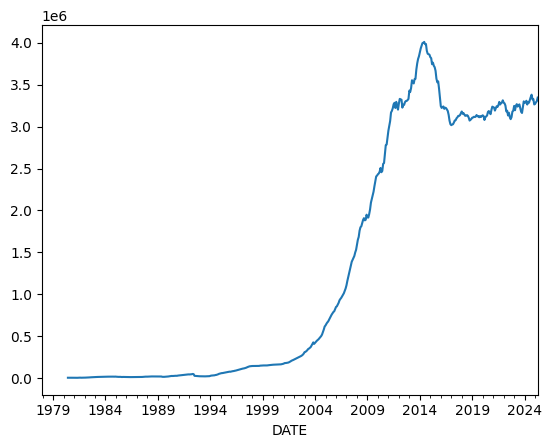

In [47]:
gold_reserves.TRESEGCNM052N.plot.line()

In [48]:
#  CBOE Gold ETF Volatility Index (GVZCLS)
# https://fred.stlouisfed.org/series/GVZCLS
gold_volatility = pdr.DataReader("GVZCLS", "fred", start=start)

<Axes: xlabel='DATE'>

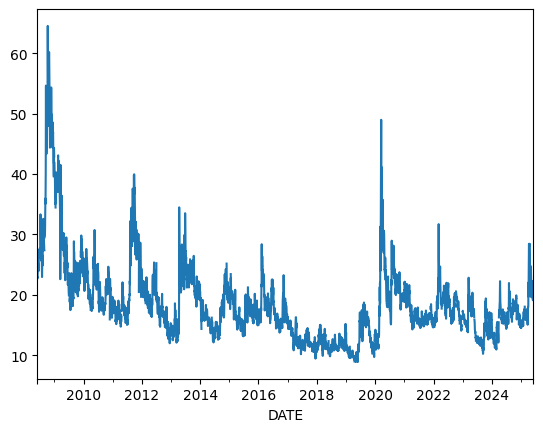

In [49]:
gold_volatility.GVZCLS.plot.line()

In [50]:
#  Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma (DCOILWTICO)
# https://fred.stlouisfed.org/series/DCOILWTICO
oil_wti = pdr.DataReader("DCOILWTICO", "fred", start=start)

<Axes: xlabel='DATE'>

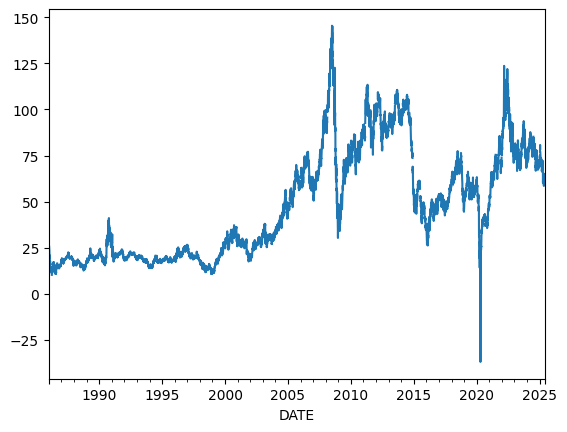

In [51]:
# there is a bug in the data? negative price?
oil_wti.DCOILWTICO.plot.line()

In [52]:
# Crude Oil Prices: Brent - Europe (DCOILBRENTEU)
# https://fred.stlouisfed.org/series/DCOILBRENTEU
oil_brent = pdr.DataReader("DCOILBRENTEU", "fred", start=start)

<Axes: xlabel='DATE'>

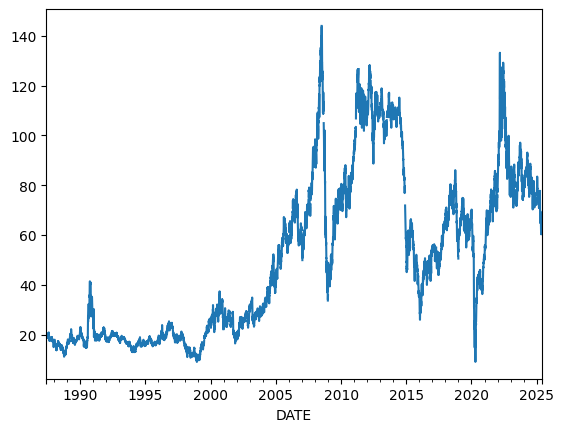

In [53]:
oil_brent.DCOILBRENTEU.plot.line()

In [54]:
# Web Scraping for Macro
# can't call directly via pd.read_html() as it returns 403 (forbidden) --> need to do a bit of work, but still no Selenium
# https://tradingeconomics.com/united-states/indicators
import requests
from bs4 import BeautifulSoup


url = "https://tradingeconomics.com/united-states/indicators"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

In [55]:

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # You need to be able to find this table tag and read all behind it
    # Find the div with class "table-responsive"
    table_div = soup.find("div", class_="table-responsive")

    # Extract the table within the div
    table = table_div.find("table")

    # Use pandas to read the table into a DataFrame
    df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list

    # Display the DataFrame
    print(df)
else:
    print("Failed to retrieve data from the webpage.")

                  Unnamed: 0     Last  Previous  Highest    Lowest  \
0                   Currency    98.90     99.12   165.00     70.70   
1               Stock Market  6008.00   6000.00  6153.00      4.40   
2            GDP Growth Rate    -0.20      2.40    35.20    -28.10   
3     GDP Annual Growth Rate     2.10      2.50    13.40     -7.50   
4          Unemployment Rate     4.20      4.20    14.90      2.50   
5          Non Farm Payrolls   139.00    147.00  4631.00 -20471.00   
6             Inflation Rate     2.30      2.40    23.70    -15.80   
7         Inflation Rate MoM     0.20     -0.10     2.00     -1.80   
8              Interest Rate     4.50      4.50    20.00      0.25   
9           Balance of Trade   -61.62   -138.00     1.95   -138.00   
10           Current Account  -304.00   -310.00     9.96   -310.00   
11    Current Account to GDP    -3.90     -3.30     0.20     -6.00   
12    Government Debt to GDP   124.00    122.00   126.00     31.80   
13         Governmen

<ipython-input-55-7e84ec23ab8e>:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list


In [56]:
df

,Unnamed: 0,Last,Previous,Highest,Lowest,Unnamed: 5,Unnamed: 6
0,Currency,98.90,99.12,165.00,70.70,NaN,Jun/25
1,Stock Market,6008.00,6000.00,6153.00,4.40,points,Jun/25
2,GDP Growth Rate,-0.20,2.40,35.20,-28.10,percent,Mar/25
3,GDP Annual Growth Rate,2.10,2.50,13.40,-7.50,percent,Mar/25
4,Unemployment Rate,4.20,4.20,14.90,2.50,percent,May/25
5,Non Farm Payrolls,139.00,147.00,4631.00,-20471.00,Thousand,May/25
6,Inflation Rate,2.30,2.40,23.70,-15.80,percent,Apr/25
7,Inflation Rate MoM,0.20,-0.10,2.00,-1.80,percent,Apr/25
8,Interest Rate,4.50,4.50,20.00,0.25,percent,May/25
9,Balance of Trade,-61.62,-138.00,1.95,-138.00,USD Billion,Apr/25


## 2.5) Financial reporting - EDGAR (in Yahoo)

In [57]:
# let's check for NVDA
nvda =  yf.Ticker('NVDA')

In [58]:
# yearly financials for the last 4 years
nvda.financials


,2025-01-31,2024-01-31,2023-01-31,2022-01-31
Tax Effect Of Unusual Items,0.0,0.0,-284130000.0,0.0
Tax Rate For Calcs,0.133,0.12,0.21,0.019
Normalized EBITDA,86137000000.0,35583000000.0,7339000000.0,11351000000.0
Total Unusual Items,0.0,0.0,-1353000000.0,0.0
Total Unusual Items Excluding Goodwill,0.0,0.0,-1353000000.0,0.0
Net Income From Continuing Operation Net Minority Interest,72880000000.0,29760000000.0,4368000000.0,9752000000.0
Reconciled Depreciation,1864000000.0,1508000000.0,1543000000.0,1174000000.0
Reconciled Cost Of Revenue,32639000000.0,16621000000.0,11618000000.0,9439000000.0
EBITDA,86137000000.0,35583000000.0,5986000000.0,11351000000.0
EBIT,84273000000.0,34075000000.0,4443000000.0,10177000000.0


In [59]:
# balance sheet
nvda.balance_sheet

,2025-01-31,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Treasury Shares Number,NaN,NaN,NaN,NaN,13800000000.0
Ordinary Shares Number,24477000000.0,24640000000.0,24661365720.0,25060000000.0,NaN
Share Issued,24477000000.0,24640000000.0,24661365720.0,25060000000.0,NaN
Net Debt,NaN,2429000000.0,7564000000.0,8956000000.0,6116000000.0
Total Debt,10270000000.0,11056000000.0,12031000000.0,11831000000.0,NaN
...,...,...,...,...,...
Allowance For Doubtful Accounts Receivable,NaN,NaN,NaN,NaN,-21000000.0
Gross Accounts Receivable,NaN,NaN,NaN,NaN,2450000000.0
Cash Cash Equivalents And Short Term Investments,43210000000.0,25984000000.0,13296000000.0,21208000000.0,NaN
Other Short Term Investments,34621000000.0,18704000000.0,9907000000.0,19218000000.0,NaN


In [60]:
# Basic info:
nvda.basic_info

/usr/local/lib/python3.11/dist-packages/yfinance/base.py:307: DeprecationWarning: 'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'
  warnings.warn("'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'", DeprecationWarning)


lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

In [61]:
# marketCap is quite useful, but don't know when it was updated? Daily?
nvda.basic_info['marketCap']/1e9

3456.2107561905

In [62]:
# read this article for full info: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

## 2.6 Web Scraping - company info for clustering

In [63]:
# ask chatGPT: emulate clicking the link and downloading the content
import requests
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://companiesmarketcap.com/"

# Define headers with a user-agent to mimic a web browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Send a GET request to the URL with headers
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the download link within the webpage
    download_link = soup.find("a", {"rel": "nofollow", "href": "?download=csv"})

    # If the download link is found
    if download_link:
        # Extract the href attribute which contains the actual download link
        download_url = 'https://companiesmarketcap.com/'+download_link["href"]

        # Download the CSV file using the obtained download URL
        download_response = requests.get(download_url, headers=headers)

        # Check if the download request was successful
        if download_response.status_code == 200:
            # Save the content of the response to a local file
            with open("global_stocks.csv", "wb") as f:
                f.write(download_response.content)
            print("CSV file downloaded successfully.")
        else:
            print("Failed to download the CSV file.")
    else:
        print("Download link not found on the webpage.")
else:
    print("Failed to retrieve data from the webpage.")

CSV file downloaded successfully.


In [64]:
global_stocks = pd.read_csv("/content/global_stocks.csv")

In [65]:
global_stocks['marketcap_b_usd'] = global_stocks.marketcap/1e9

In [66]:
global_stocks.head(10)

,Rank,Name,Symbol,marketcap,price (USD),country,marketcap_b_usd
0,1,Microsoft,MSFT,3496118321152,470.38000,United States,3496.118321
1,2,NVIDIA,NVDA,3456210829312,141.72000,United States,3456.210829
2,3,Apple,AAPL,3045708267520,203.92000,United States,3045.708268
3,4,Amazon,AMZN,2267344535552,213.57000,United States,2267.344536
4,5,Alphabet (Google),GOOG,2114328068096,174.92000,United States,2114.328068
5,6,Meta Platforms (Facebook),META,1754273284096,697.71000,United States,1754.273284
6,7,Saudi Aramco,2222.SR,1599254537283,6.61245,Saudi Arabia,1599.254537
7,8,Broadcom,AVGO,1161052422144,246.93000,United States,1161.052422
8,9,Berkshire Hathaway,BRK-B,1064766275584,493.53000,United States,1064.766276
9,10,TSMC,TSM,1064170160128,205.18000,Taiwan,1064.170160


In [67]:
global_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10369 entries, 0 to 10368
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             10369 non-null  int64  
 1   Name             10369 non-null  object 
 2   Symbol           10368 non-null  object 
 3   marketcap        10369 non-null  int64  
 4   price (USD)      10369 non-null  float64
 5   country          10369 non-null  object 
 6   marketcap_b_usd  10369 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 567.2+ KB
